<a href="https://colab.research.google.com/github/justlikethatHwan/Python/blob/main/240116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 도미 데이터
# http://bit.ly/bream_smelt

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [4]:
# 빙어 데이터
# http://bit.ly/smelt_list

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

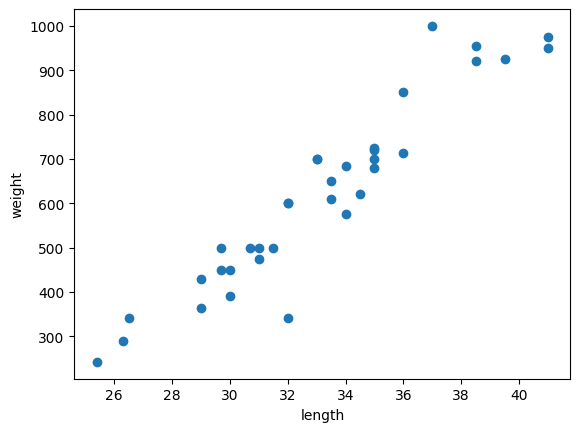

In [5]:
plt.scatter(bream_length,bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

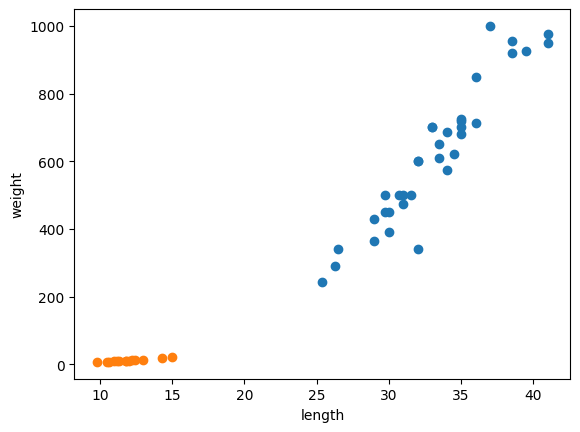

In [6]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [8]:
fish_data = [[l,w] for l, w in zip(length,weight)]

In [9]:
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [10]:
# 도미는 1, 빙어는 0
fish_target = [1] * len(bream_length) + [0] * len(smelt_length)

In [11]:
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [12]:
# KNN 모델 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [13]:
kn = KNeighborsClassifier() # 모델 선언

In [14]:
kn.fit(fish_data, fish_target) # 모델 학습

KNeighborsClassifier()

In [15]:
kn.score(fish_data, fish_target) # 모델 평가

1.0

In [16]:
trans = {1:'도미입니다.', 0:'빙어입니다.'}
trans[kn.predict([[100,2000]])[0]]

'도미입니다.'

In [17]:
kn_49 = KNeighborsClassifier(n_neighbors=49) # k개 파라미터 49개 이웃을 고려

In [18]:
kn_49.fit(fish_data, fish_target)
kn_49.score(fish_data, fish_target)

0.7142857142857143

In [19]:
# 미드라이너의 경기당 와드 구매 개수, 분당 cs를 통해 사용자 티어 예측

# 다이아 티어 이상 유저의 데이터
dia_ward_set = [5, 5, 5, 6, 4, 8, 7, 6, 5, 7]
dia_cs_per_game = [90, 100, 80, 110, 100, 100, 80, 90, 110, 100]

# 다이아 티어 미만 유저의 데이터
ibsgp_ward_set = [2, 1, 0, 3, 4, 5, 4, 2, 2, 3]
ibsgp_cs_per_game = [50, 60, 50, 40, 60, 50, 40, 60, 70, 50]

In [20]:
ward_set = dia_ward_set + ibsgp_ward_set
cs_per_game = dia_cs_per_game + ibsgp_cs_per_game

In [21]:
tier_data = [[wc,cs] for wc, cs in zip(ward_set,cs_per_game)]

In [22]:
tier_data

[[5, 90],
 [5, 100],
 [5, 80],
 [6, 110],
 [4, 100],
 [8, 100],
 [7, 80],
 [6, 90],
 [5, 110],
 [7, 100],
 [2, 50],
 [1, 60],
 [0, 50],
 [3, 40],
 [4, 60],
 [5, 50],
 [4, 40],
 [2, 60],
 [2, 70],
 [3, 50]]

In [23]:
tier_target = [1] * len(dia_ward_set) + [0] * len(ibsgp_ward_set)

In [24]:
tier_target

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [25]:
knn = KNeighborsClassifier() # 모델 선언

In [26]:
knn.fit(tier_data, tier_target) # 모델 학습

KNeighborsClassifier()

In [27]:
knn.score(tier_data,tier_target) # 모델 평가

1.0

In [28]:
trans = {1:'다이아 이상입니다.', 0:'다이아 미만입니다.'}
trans[knn.predict([[11,80]])[0]]

'다이아 이상입니다.'

In [29]:
input_arr = np.array(fish_data)
input_target = np.array(fish_target)

In [30]:
np.random.seed(1)
random_index = np.arange(len(input_arr))
np.random.shuffle(random_index)

In [31]:
random_index

array([27, 34, 39, 48,  2,  3, 42, 29, 45, 30, 31, 38, 21, 35, 19, 41, 36,
       26, 22, 13, 40, 17, 44, 24, 23,  4, 32, 14, 10, 28, 47, 33, 18, 20,
       25,  6,  7, 46,  1, 16,  0, 15,  5, 11,  9,  8, 12, 43, 37])

In [32]:
input_arr[[1,3]]

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [33]:
train_input = input_arr[random_index[:35]]
test_input = input_arr[random_index[35:]]
train_target = input_target[random_index[:35]]
test_target = input_target[random_index[35:]]

In [34]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [35]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [36]:
fish_data = np.column_stack((fish_length,fish_weight))

In [37]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train_input,test_input,train_target,test_target = train_test_split(fish_data,fish_target,test_size=0.2,random_state=2)

In [40]:
len(fish_data)

49

In [41]:
len(test_input)

10

In [42]:
len(train_input)

39

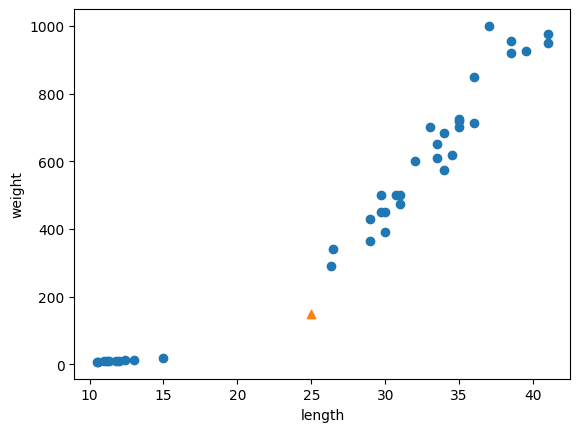

In [43]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [44]:
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [45]:
kn.predict([[25,150]])

array([0.])

In [46]:
distances, indexes = kn.kneighbors([[25,150]])

In [47]:
train_input[indexes,0]

array([[15. , 12.4, 13. , 26.3, 11.8]])

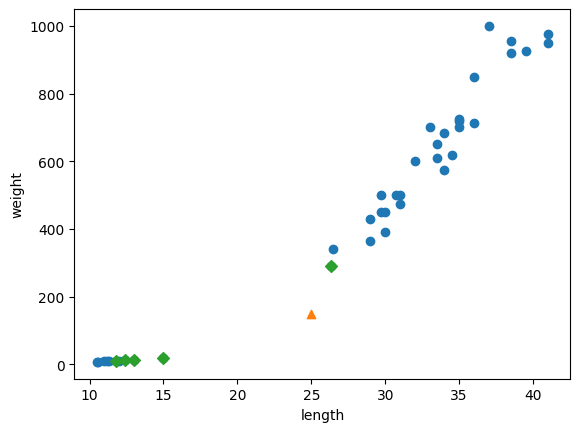

In [48]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [49]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input , axis = 0)

In [50]:
train_scaled = (train_input - mean) / std

In [51]:
train_scaled

array([[-0.14111627, -0.42396813],
       [ 0.27763093,  0.06504502],
       [ 0.50694487,  0.67631146],
       [ 1.0553043 ,  1.34870454],
       [ 0.7063483 ,  0.75271976],
       [-1.48708942, -1.42583383],
       [ 0.90575173,  1.59321112],
       [ 0.80605002,  0.71910011],
       [-0.16105662, -0.57678474],
       [ 0.7063483 ,  0.67631146],
       [ 1.30455859,  1.51680281],
       [-1.68649285, -1.43347466],
       [ 0.55679573,  0.52349485],
       [-1.73634371, -1.44019859],
       [ 0.30754144, -0.01136329],
       [ 0.10813801, -0.14889824],
       [ 0.17792921,  0.06504502],
       [ 0.10813801, -0.35367249],
       [-1.66655251, -1.43316903],
       [ 0.17792921, -0.08777159],
       [ 1.15500602,  1.3639862 ],
       [ 0.80605002,  1.13476129],
       [ 0.60664659,  0.29426993],
       [ 0.7063483 ,  0.7374381 ],
       [-1.72637354, -1.44172676],
       [ 0.60664659,  0.63046648],
       [-1.60673148, -1.43255776],
       [ 1.0553043 ,  1.45567617],
       [ 1.30455859,

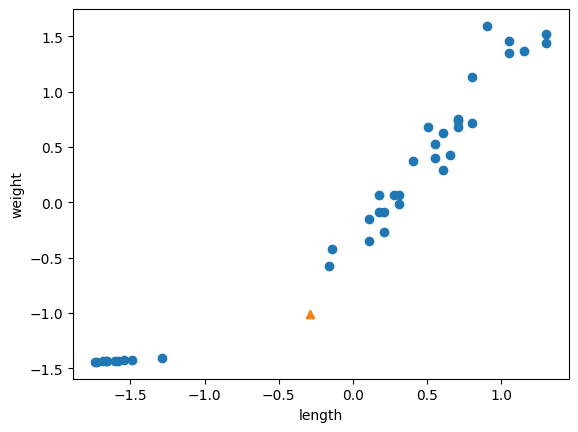

In [52]:
new_fish = ([25,150] - mean) / std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new_fish[0],new_fish[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [53]:
kn.fit(train_scaled , train_target)

KNeighborsClassifier()

In [54]:
test_scaled = (test_input - mean) / std

In [55]:
kn.score(test_scaled,test_target)

1.0

In [56]:
kn.predict([new_fish])

array([1.])

In [57]:
distances, indexes = kn.kneighbors([new_fish])

In [58]:
train_scaled[indexes,0]

array([[-0.16105662, -0.14111627,  0.10813801,  0.20783973,  0.10813801]])

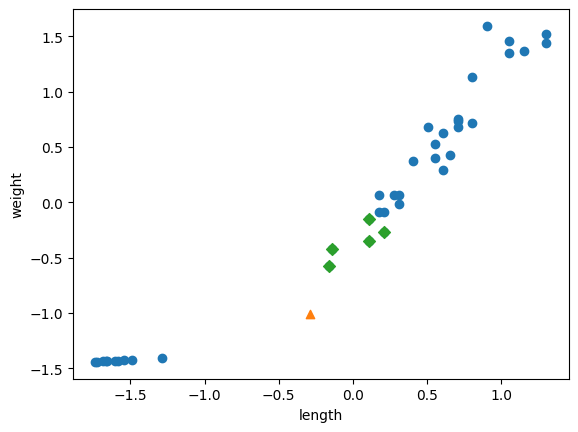

In [59]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new_fish[0],new_fish[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [60]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data=load_breast_cancer()

In [61]:
import pandas as pd

In [62]:
df_data=pd.DataFrame(breast_cancer_data.data,columns=breast_cancer_data.feature_names)
df_labels=pd.DataFrame(breast_cancer_data.target)

In [63]:
df_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [64]:
input_data=np.array(df_data)
target_data=np.array(df_labels)

In [65]:
train_data,test_data,train_target,test_target=train_test_split(input_data,target_data,test_size=0.2,random_state=100)

In [66]:
mean=np.mean(train_data, axis=0)
std=np.std(train_data,axis=0)
train_scaled=(train_data-mean)/std
test_scaled=(test_data-mean)/std

In [67]:
from tqdm import tqdm
tqdm.pandas()

In [68]:
kn=KNeighborsClassifier()
kn.fit(train_data,train_target)
kn.score(test_data,test_target)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9473684210526315

In [69]:
k_lst=range(1,101)
accuracy_lst=[]
for k in tqdm(k_lst):
  kn=KNeighborsClassifier(n_neighbors=k)
  kn.fit(train_scaled,train_target)
  acc=kn.score(test_scaled,test_target)
  accuracy_lst.append(acc)

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
  1%|          | 1/100 [00:00<00:25,  3.81it/s]/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
  2%|▏         | 2/100 [00:00<00:18,  5.44it/s]/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215:

<function matplotlib.pyplot.show(close=None, block=None)>

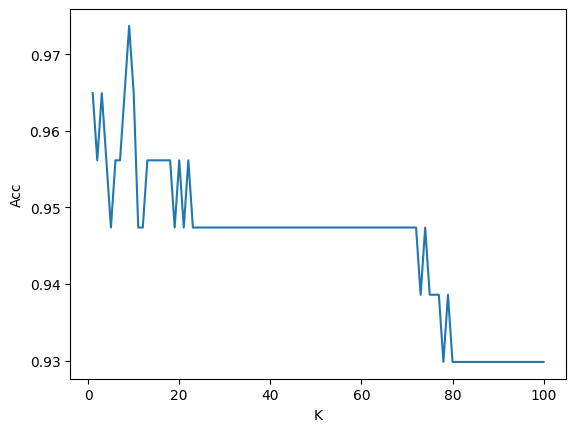

In [70]:
plt.plot(k_lst, accuracy_lst)
plt.xlabel('K')
plt.ylabel('Acc')
plt.show

In [71]:
accuracy_lst[8]

0.9736842105263158

In [72]:
accuracy_lst.index(max(accuracy_lst))

8